# Machine Learning Exercise

In [105]:
import pandas as pd # Data processing
import numpy as np # Linear algebra

import matplotlib.pyplot as plt # Plotting data and visualizing data
import seaborn as sns # Statistical data visualization
%matplotlib inline 

# ML for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Control Display ! this optional
pd.options.display.max_columns = 50
sns.set(style = 'darkgrid',rc={'axes.facecolor': '#CAF1DE'})


# Read the dataset from CSV
df = pd.read_csv("heart_disease.csv")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [106]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [107]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


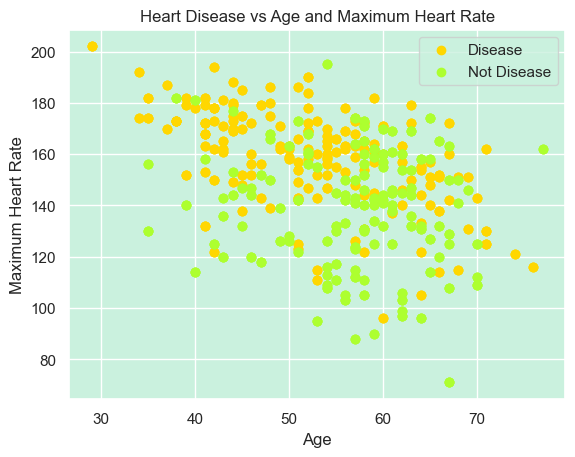

In [108]:
# Scatter plot for heart disese vs age and maximum heart rate
plt.scatter(x=df.age[df.target==1], y=df.thalach[df.target==1], c='#FFD700', label = 'Disease')
plt.scatter(x=df.age[df.target==0], y=df.thalach[df.target==0], c='#ADFF2F', label = 'Not Disease')

# Add a legend
plt.legend()
# Add lebels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

# Set the title of the plot 
plt.title('Heart Disease vs Age and Maximum Heart Rate')

# Display plot
plt.show()

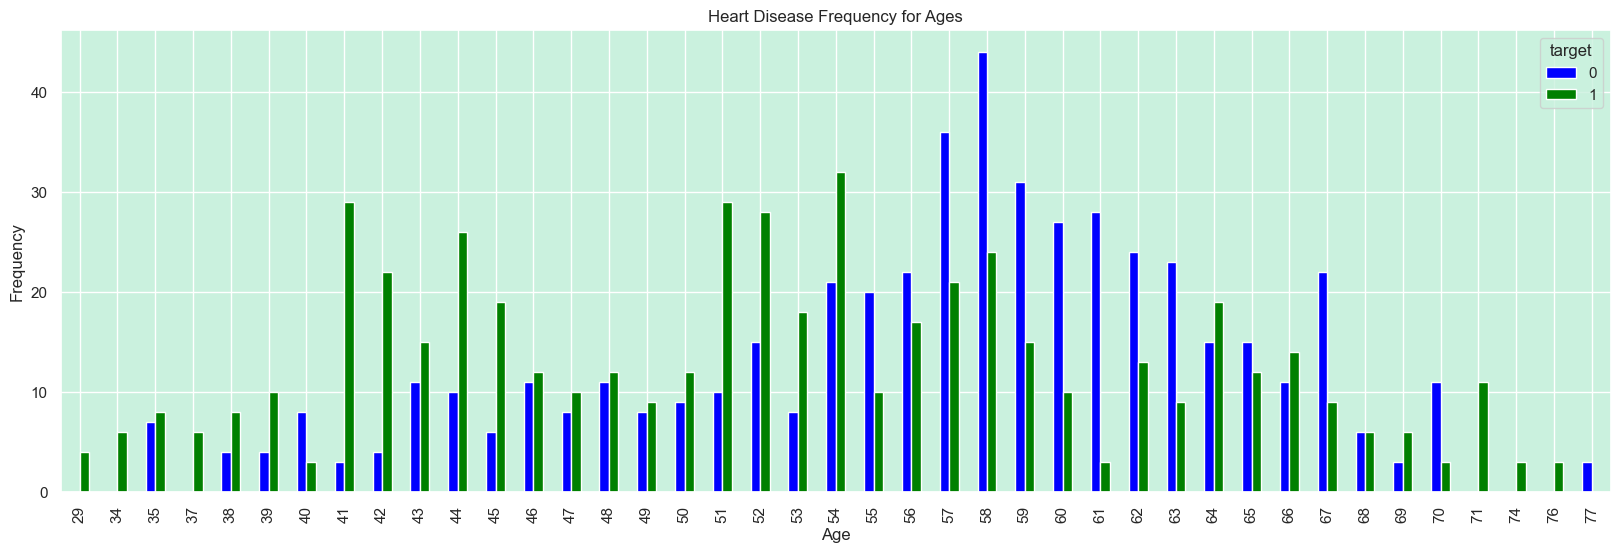

In [109]:
# Barplot showing heart disease frequency of age
pd.crosstab(df.age, df.target).plot(kind='bar', figsize = (20,6), color= ['blue', 'green'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

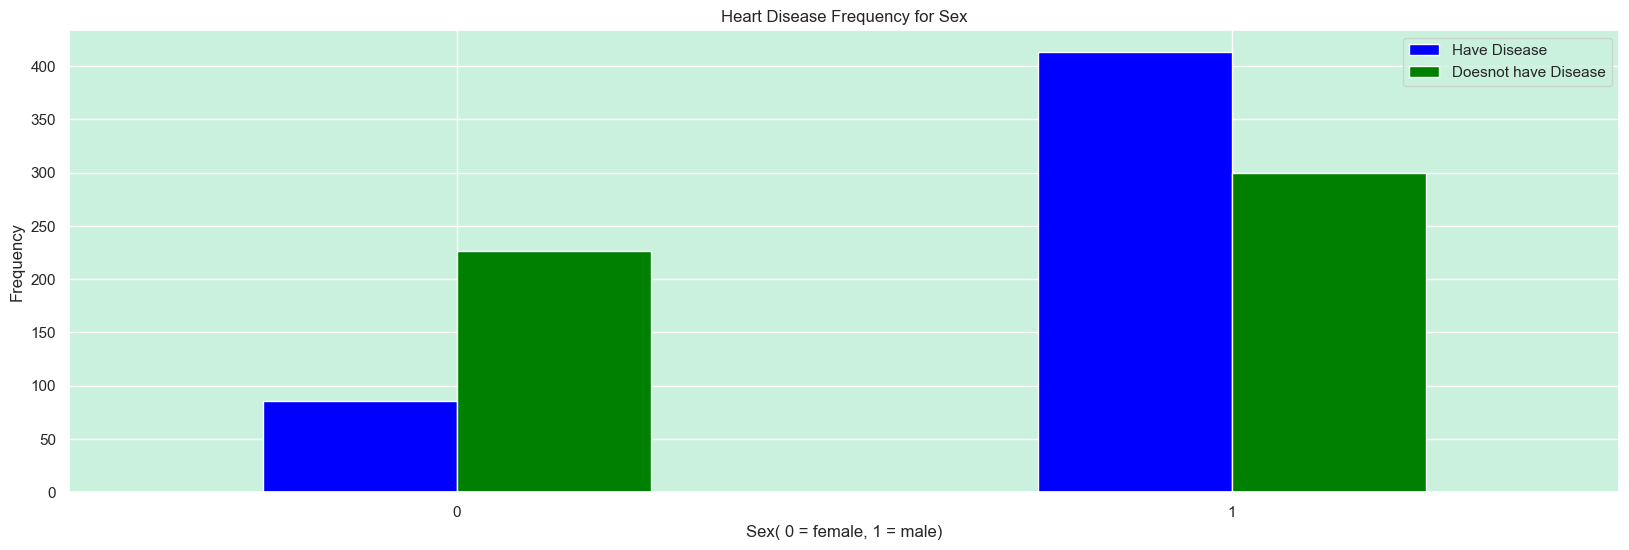

In [110]:
# Barplot showing heart disease frequency for sex
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize = (20,6), color= ['blue', 'green'])
plt.title('Heart Disease Frequency for Sex')
plt.legend(['Have Disease', 'Doesnot have Disease'])
plt.xlabel('Sex( 0 = female, 1 = male)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [111]:
# Creating a model for Logistic Regression
y = df.target.values # independent variable
x_data = df.drop(['target'], axis = 1)

In [112]:
# Normalize the data x = (x-xmin)/ (xmax-xmin)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [113]:
# Split data 80% train 20% test 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 0)

In [114]:
# Transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [115]:
# Get accuracy using the Logistic Regression
# Getting the test accuracy
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T) * 100

accuracies['LogisticRegression']= acc

# Get output
print('Test accuracy {:.2f}%'.format(acc))

Test accuracy 72.68%


In [117]:
# First import the K-nearest Neighbours (KNN) classifier
# Get accuracy score of the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

# Get output display
print('{} NN Score {:.2f}%'.format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score 95.12%


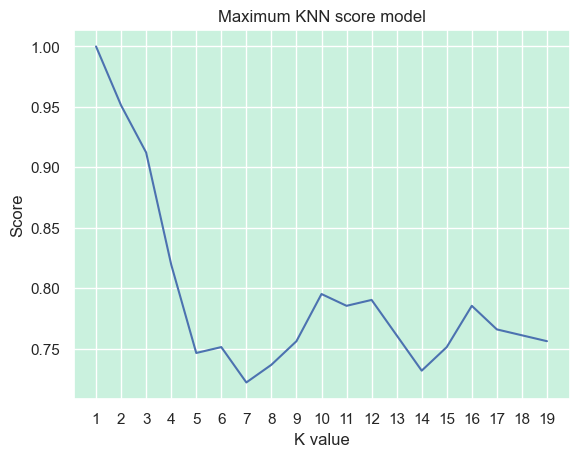

Maximum KNN score is 100.00


In [118]:
# Get maximum KNN score for the model
score_list=[]
for i in range(1,20):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train.T, y_train)
    score_list.append(knn2.score(x_test.T, y_test.T))
    
# Show using Line Plot   
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Maximum KNN score model')
plt.show()

# Get maximum KNN score for the model in percentage
acc = max(score_list)*100
accuracies['KNN']= acc
print('Maximum KNN score is {:.2f}'.format(acc))

In [119]:
# Get Test accuracy using the Support Vector Machine (SVM) algorithm
from sklearn.svm import SVC
svm= SVC(random_state=1)
svm.fit(x_train.T, y_train.T)
acc = svm.score(x_train.T, y_train.T) * 100
accuracies['SVM']= acc
print('Test Accuracy of SVM Algorithm: {:.2f}%'.format(acc))

Test Accuracy of SVM Algorithm: 70.24%


In [120]:
# Get accuracy using the Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T, y_test.T) * 100
accuracies['Naive Bayes']= acc
print('Accuracy of Naive Bayes: {:.2f}%'.format(acc))

Accuracy of Naive Bayes: 85.37%


In [121]:
# Get accuracy using decision tree model
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T) * 100
accuracies['Decision Tree'] = acc
print('Decision Tree Test Accuracy: {:.2f}%'.format(acc))

Decision Tree Test Accuracy: 100.00%


In [122]:
# Get accuracy of Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(n_estimators = 1000, random_state =1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T, y_test.T) * 100
accuracies['Random Forest'] = acc
print('Random Forest Algorithm Accuracy score: {:.2f}%'.format(acc))

Random Forest Algorithm Accuracy score: 100.00%


<function matplotlib.pyplot.show(close=None, block=None)>

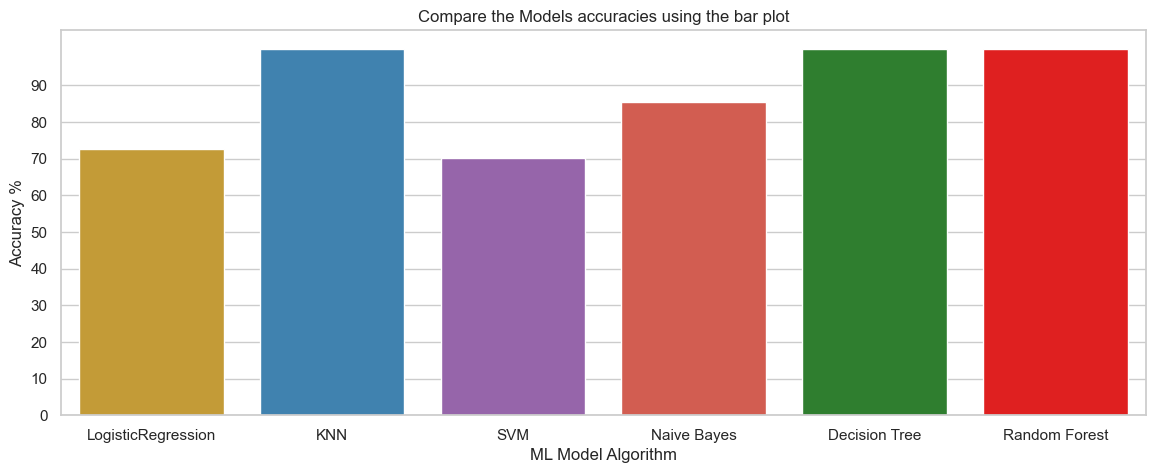

In [123]:
# compare the accuracies of the models using a bar plot from sns
colors = ['#DAA520', '#2E86C1', '#9B59B6', '#E74C3C', '#228B22','red']
sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Accuracy %')
plt.xlabel('ML Model Algorithm')
plt.title('Compare the Models accuracies using the bar plot')
sns.barplot(x=list(accuracies.keys()), y= list(accuracies.values()), palette = colors)
plt.show

In [124]:
# ML Confusion Matrix
# Evaluate the perfomace of a classificaton model

In [125]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)


In [126]:
# Import module for confusion matrix
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_rf = confusion_matrix(y_test, y_head_rf)

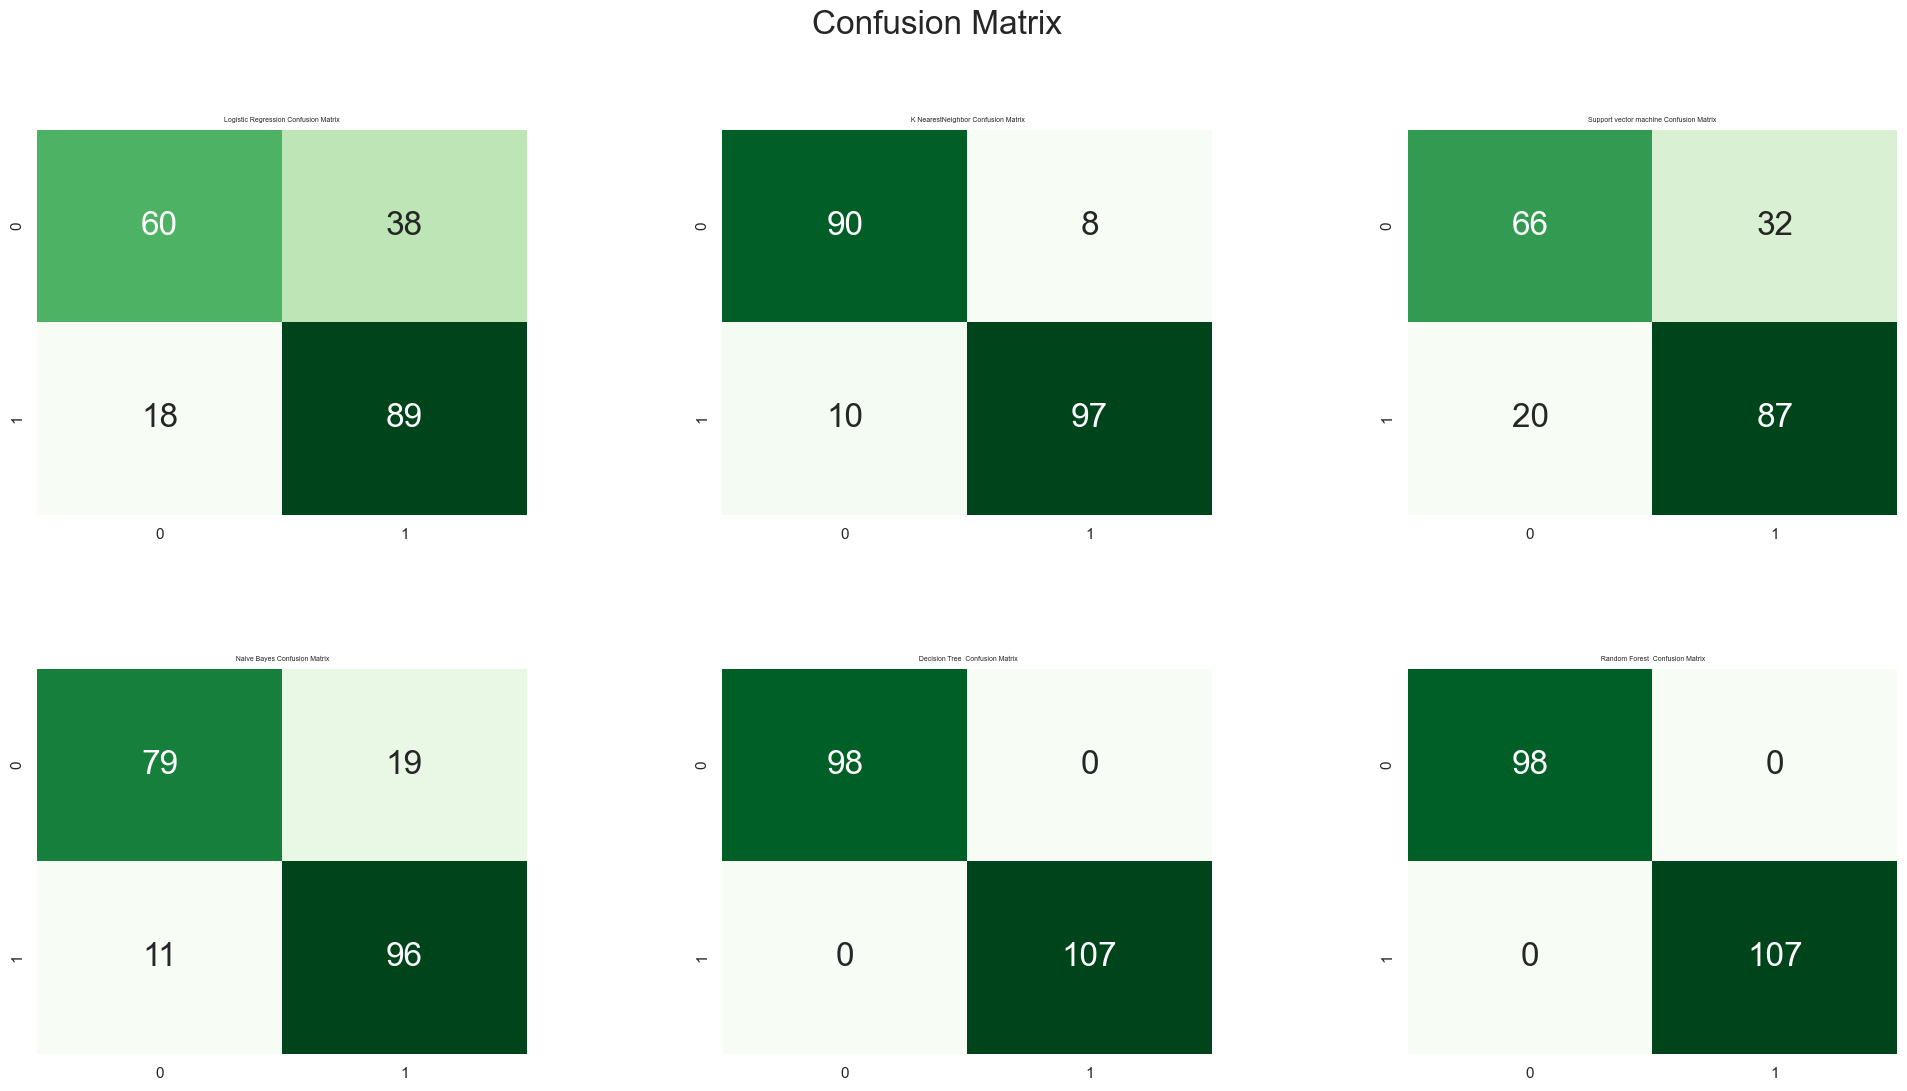

In [127]:
# Plotting confusion matrices using heat map
plt.figure(figsize=(24, 12))
plt.suptitle('Confusion Matrix', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Heatmap for Logistic Regression Confusion Matrix
plt.subplot(2, 3, 1)
plt.title('Logistic Regression Confusion Matrix', fontsize=5)
sns.heatmap(cm_lr, annot=True, cmap='Greens', fmt='d', cbar=False, annot_kws={'size': 24})

# Heatmap for K NearestNeighbor Confusion Matrix
plt.subplot(2, 3, 2)
plt.title(' K NearestNeighbor Confusion Matrix', fontsize=5)
sns.heatmap(cm_knn, annot=True, cmap='Greens', fmt='d', cbar=False, annot_kws={'size': 24})

# Heatmap for Support vector machine Confusion Matrix
plt.subplot(2, 3, 3)
plt.title('Support vector machine Confusion Matrix', fontsize=5)
sns.heatmap(cm_svm, annot=True, cmap='Greens', fmt='d', cbar=False, annot_kws={'size': 24})

# Heatmap for Naive Bayes Confusion Matrix
plt.subplot(2, 3, 4)
plt.title(' Naive Bayes Confusion Matrix', fontsize=5)
sns.heatmap(cm_nb, annot=True, cmap='Greens', fmt='d', cbar=False, annot_kws={'size': 24})

# Heatmap for Decision Tree Confusion Matrix
plt.subplot(2, 3, 5)
plt.title(' Decision Tree  Confusion Matrix', fontsize=5)
sns.heatmap(cm_dtc, annot=True, cmap='Greens', fmt='d', cbar=False, annot_kws={'size': 24})

# Heatmap for Random Forest Confusion Matrix
plt.subplot(2, 3, 6)
plt.title(' Random Forest  Confusion Matrix', fontsize=5)
sns.heatmap(cm_rf, annot=True, cmap='Greens', fmt='d', cbar=False, annot_kws={'size': 24})


plt.show()
